In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

In [50]:
%matplotlib inline

In [3]:
%matplotlib qt

In [4]:
positionFingersLeft = pd.read_excel("C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/New Session-002.xlsx", sheet_name="ns1 positionFingersLeft")
positionFingersRight = pd.read_excel("C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/New Session-002.xlsx", sheet_name="ns1 positionFingersRight")

# Plot xyz

## Left fingers

In [5]:
x_positions = [position for position in list(positionFingersLeft.columns) if "_x" in position]
y_positions = [position for position in list(positionFingersLeft.columns) if "_y" in position]
z_positions = [position for position in list(positionFingersLeft.columns) if "_z" in position]

positions = [position.split("_")[0] for position in list(positionFingersLeft.columns)]
# Remove duplicates
positions = list(dict.fromkeys(positions))

In [6]:
positionFingersLeft_xyz = positionFingersLeft.copy()

positionFingersLeft_xyz['x'] = positionFingersLeft_xyz.apply(lambda x: 
                                                  list([x[position] for position in x_positions]), axis=1)

positionFingersLeft_xyz['y'] = positionFingersLeft_xyz.apply(lambda x: 
                                                  list([x[position] for position in y_positions]), axis=1)

positionFingersLeft_xyz['z'] = positionFingersLeft_xyz.apply(lambda x: 
                                                  list([x[position] for position in z_positions]), axis=1)

for position in positions:
    del positionFingersLeft_xyz[position + "_x"]
    del positionFingersLeft_xyz[position + "_y"]
    del positionFingersLeft_xyz[position + "_z"]

## Right fingers

In [7]:
x_positions = [position for position in list(positionFingersRight.columns) if "_x" in position]
y_positions = [position for position in list(positionFingersRight.columns) if "_y" in position]
z_positions = [position for position in list(positionFingersRight.columns) if "_z" in position]

positions = [position.split("_")[0] for position in list(positionFingersRight.columns)]
# Remove duplicates
positions = list(dict.fromkeys(positions))

In [8]:
positionFingersRight_xyz = positionFingersRight.copy()

positionFingersRight_xyz['x'] = positionFingersRight_xyz.apply(lambda x: 
                                                  list([x[position] for position in x_positions]), axis=1)

positionFingersRight_xyz['y'] = positionFingersRight_xyz.apply(lambda x: 
                                                  list([x[position] for position in y_positions]), axis=1)

positionFingersRight_xyz['z'] = positionFingersRight_xyz.apply(lambda x: 
                                                  list([x[position] for position in z_positions]), axis=1)

for position in positions:
    del positionFingersRight_xyz[position + "_x"]
    del positionFingersRight_xyz[position + "_y"]
    del positionFingersRight_xyz[position + "_z"]

## Plot both hands

In [9]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)
    
    
    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])
    
    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    print([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    print([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    print([z_middle - plot_radius, z_middle + plot_radius])

In [10]:
def set_fixed_axes(ax):
    ax.set_xlim3d([-0.746, -0.250])
    ax.set_ylim3d([-0.468, 0.027])
    ax.set_zlim3d([0.307, 0.804])
    
def set_fixed_axes_1hand(ax):  
    ax.set_xlim3d([-0.294, -0.157])
    ax.set_ylim3d([-0.491, -0.354])
    ax.set_zlim3d([0.564, 0.700])

def set_fixed_axes_drill(ax):
    ax.set_xlim3d([-0.506, -0.041])
    ax.set_ylim3d([-0.268, 0.196])
    ax.set_zlim3d([0.909, 1.374])
    
def set_fixed_axes_max(ax):
    ax.set_xlim3d([-0.9935, 0.3533])
    ax.set_ylim3d([-0.9284, 0.4184])
    ax.set_zlim3d([0.2606, 1.6075])

In [11]:
def save_png(xyzs, i, out_dir):
    # Save png
    out_pth = os.path.join(out_dir, f"frame_{i}.png")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs, ys, zs = xyzs
    ax.scatter(xs=xs, ys=ys, zs=zs, label="frame " + str(i+1))
    set_fixed_axes_max(ax)
    plt.axis('off')
    ax.view_init(azim=0, elev=45)
    #plt.show()
    plt.tight_layout()
    #ax.legend()
    plt.savefig(out_pth, transparent=False, edgecolor='none', dpi=300)
    plt.close()

In [12]:
out_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/New Session-002_png"

#if not os.path.exists(out_dir):
#    os.makedirs(out_dir)
    
start = 5900
end = positionFingersLeft_xyz.shape[0]
end = 7900

start = 0
end = positionFingersLeft_xyz.shape[0]
end = 5900


for frame in range(start, end):
    xs_left = positionFingersLeft_xyz.loc[frame,"x"]
    ys_left = positionFingersLeft_xyz.loc[frame,"y"]
    zs_left = positionFingersLeft_xyz.loc[frame,"z"]

    xs_right = positionFingersRight_xyz.loc[frame,"x"]
    ys_right = positionFingersRight_xyz.loc[frame,"y"]
    zs_right = positionFingersRight_xyz.loc[frame,"z"]

    xs = xs_left + xs_right
    ys = ys_left + ys_right
    zs = zs_left + zs_right

    xyzs = (xs, ys, zs)

    save_png(xyzs, frame, out_dir)
    
    break

# Plot with lines

In [43]:
positionFingers = pd.concat([positionFingersLeft, positionFingersRight], axis=1)
positions = [position.split("_")[0] for position in list(positionFingers.columns)]
positions = list(dict.fromkeys(positions))
positionFingers_lines = positionFingers.copy()

lines = {
    
    'r_first':  ['RightCarpus', 'RightFirstMC',  'RightFirstPP', 'RightFirstDP'],
    'r_second': ['RightCarpus', 'RightSecondMC', 'RightSecondPP','RightSecondMP','RightSecondDP'],
    'r_third':  ['RightCarpus', 'RightThirdMC',  'RightThirdPP', 'RightThirdMP', 'RightThirdDP'],
    'r_fourth': ['RightCarpus', 'RightFourthMC', 'RightFourthPP','RightFourthMP','RightFourthDP'],
    'r_fifth':  ['RightCarpus', 'RightFifthMC' , 'RightFifthPP', 'RightFifthMP', 'RightFifthDP'],
    
    'l_first':  ['LeftCarpus',  'LeftFirstMC',   'LeftFirstPP', 'LeftFirstDP'],
    'l_second': ['LeftCarpus',  'LeftSecondMC',  'LeftSecondPP','LeftSecondMP','LeftSecondDP'],
    'l_third':  ['LeftCarpus',  'LeftThirdMC' ,  'LeftThirdPP', 'LeftThirdMP', 'LeftThirdDP'],
    'l_fourth': ['LeftCarpus',  'LeftFourthMC' , 'LeftFourthPP','LeftFourthMP','LeftFourthDP'],
    'l_fifth':  ['LeftCarpus',  'LeftFifthMC' ,  'LeftFifthPP', 'LeftFifthMP', 'LeftFifthDP'] 
}


    
for line, line_positions in lines.items():
    line_positions_x = [line_position + "_x" for line_position in line_positions]
    positionFingers_lines[line + "_x"] = positionFingers_lines.apply(lambda x: 
                                                  list([x[position] for position in line_positions_x]), axis=1)
    
    line_positions_y = [line_position + "_y" for line_position in line_positions]
    positionFingers_lines[line + "_y"] = positionFingers_lines.apply(lambda x: 
                                                  list([x[position] for position in line_positions_y]), axis=1)
    
    line_positions_z = [line_position + "_z" for line_position in line_positions]
    positionFingers_lines[line + "_z"] = positionFingers_lines.apply(lambda x: 
                                                  list([x[position] for position in line_positions_z]), axis=1)
    
for position in positions:
    del positionFingers_lines[position + "_x"]
    del positionFingers_lines[position + "_y"]
    del positionFingers_lines[position + "_z"]

In [58]:
out_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/line_png_drill"

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
start = 5900
end = 7899

for frame in range(start, end):
    out_pth = os.path.join(out_dir, f"frame_{frame}.png")
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    for line in lines:
        xs = positionFingers_lines.loc[frame, line + "_x"]
        ys = positionFingers_lines.loc[frame, line + "_y"]
        zs = positionFingers_lines.loc[frame, line + "_z"]

        ax.plot(xs, ys, zs, c='black')
    
    #set_fixed_axes_max(ax)
    set_fixed_axes_drill(ax)
    plt.axis('off')
    ax.view_init(azim=0, elev=45)
    plt.tight_layout()
    plt.savefig(out_pth, transparent=False, edgecolor='none', dpi=150)
    plt.close()

# Plot locations

In [20]:
frame = 0

xs_left = positionFingersLeft_xyz.loc[frame,"x"]
ys_left = positionFingersLeft_xyz.loc[frame,"y"]
zs_left = positionFingersLeft_xyz.loc[frame,"z"]

xs_right = positionFingersRight_xyz.loc[frame,"x"]
ys_right = positionFingersRight_xyz.loc[frame,"y"]
zs_right = positionFingersRight_xyz.loc[frame,"z"]

xs = xs_left + xs_right
ys = ys_left + ys_right
zs = zs_left + zs_right


xs = xs_right
ys = ys_right
zs = zs_right

In [21]:
positions

['RightCarpus',
 'RightFirstMC',
 'RightFirstPP',
 'RightFirstDP',
 'RightSecondMC',
 'RightSecondPP',
 'RightSecondMP',
 'RightSecondDP',
 'RightThirdMC',
 'RightThirdPP',
 'RightThirdMP',
 'RightThirdDP',
 'RightFourthMC',
 'RightFourthPP',
 'RightFourthMP',
 'RightFourthDP',
 'RightFifthMC',
 'RightFifthPP',
 'RightFifthMP',
 'RightFifthDP']

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, position in enumerate(positions):
    ax.scatter(xs=xs[i], ys=ys[i], zs=zs[i], label=position)
    
set_fixed_axes_1hand(ax)
plt.axis('off')
ax.view_init(azim=153, elev=167)
ax.legend()
plt.show()

# Projection

In [99]:
from skspatial.objects import Plane
from skspatial.objects import Point
from skspatial.objects import Vector
from skspatial.plotting import plot_3d


plane = Plane(point=[-1,-1,-10], normal=[1, -1, 0])
point = Point([5, 9, 3])

point_projected = plane.project_point(point)
vector_projection = Vector.from_points(point, point_projected)

vector_projection

Vector([ 2., -2.,  0.])

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

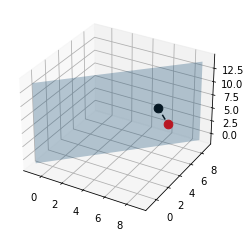

In [100]:
plot_3d(
    plane.plotter(lims_x=(0, 10), lims_y=(0, 15), alpha=0.3),
    point.plotter(s=75, c='k'),
    point_projected.plotter(c='r', s=75, zorder=3),
    vector_projection.plotter(point=point, c='k', linestyle='--'),
)

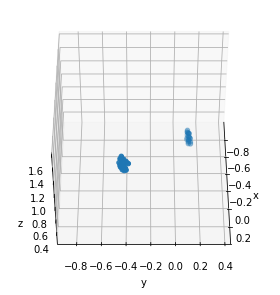

In [101]:




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = xyzs
ax.scatter(xs=xs, ys=ys, zs=zs)
set_fixed_axes_max(ax)

ax.view_init(azim=0, elev=45)
#
plt.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [102]:
np_xyzs = np.array(xyzs).T
xyzs_projected = np.zeros_like(np_xyzs)

for i, xyz in enumerate(np_xyzs):
    point = Point(xyz)

    point_projected = plane.project_point(point)
    
    xyzs_projected[i,:] = point_projected

In [103]:
val = np.sqrt(2)/2
rot_mat = np.array([[val, -val, 0],
          [val, val, 0],
          [0, 0, 1]])

In [104]:
x  = np.matmul(xyzs_projected, rot_mat)[:,0]
y  = np.matmul(xyzs_projected, rot_mat)[:,2]



In [105]:
import matplotlib.pyplot as plt

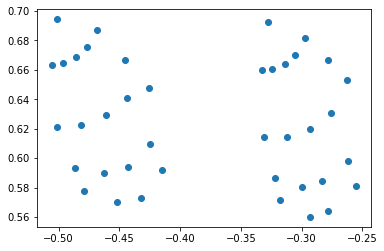

In [106]:
plt.scatter(x, y)

In [23]:
from collections import defaultdict
right_max = defaultdict(list)
right_min = defaultdict(list)

for position in positionFingersRight:
    axis = position.split("_")[-1]
    right_max[axis].append(max(positionFingersRight[position]))
    right_min[axis].append(min(positionFingersRight[position]))
    
    
left_max = defaultdict(list)
left_min = defaultdict(list)    
for position in positionFingersLeft:
    axis = position.split("_")[-1]
    left_max[axis].append(max(positionFingersLeft[position]))
    left_min[axis].append(min(positionFingersLeft[position]))
    

maxs = {}
mins = {}

for axis in right_max:
    maxs[axis] = max(max(right_max[axis]), max(left_max[axis]))
    mins[axis] = min(min(right_min[axis]), min(left_min[axis]))
    
xs = [-0.643088, 0.00285]
ys = [-0.86719, 0.357248]
zs = [0.47831, 1.389879]